## Task 2

### (c)

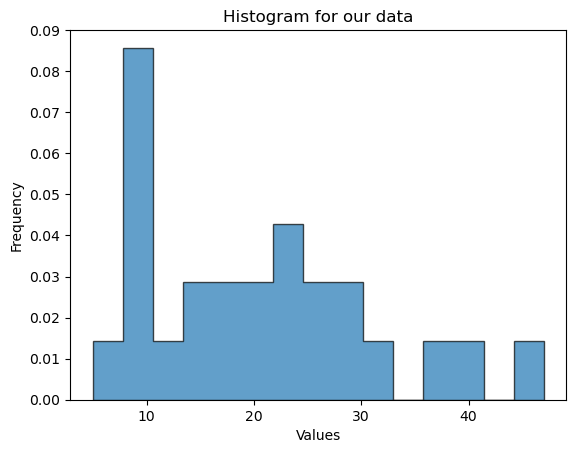

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

# Sample data
data = [
9, 39, 38, 23, 8, 47, 21, 22, 18, 10, 17, 22, 14,
9, 5, 26, 11, 31, 15, 25, 9, 29, 28, 19, 8]

# Plotting the histogram
plt.hist(data, bins=15, density=True, edgecolor='black', alpha=0.7, histtype='stepfilled')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for our data')

# Save the plot as a PDF file
plt.savefig('C:/Users/Popov/Documents/NES_studies/Python/Statistics/HA2/histogram.pdf')

# Display the plot
plt.show()

### (d)

In [2]:
# Calculate mean
X_bar = sum(data) / len(data)
X_bar

20.12

In [3]:
# Beta_MLE
Beta_MLE = X_bar/4
Beta_MLE

5.03

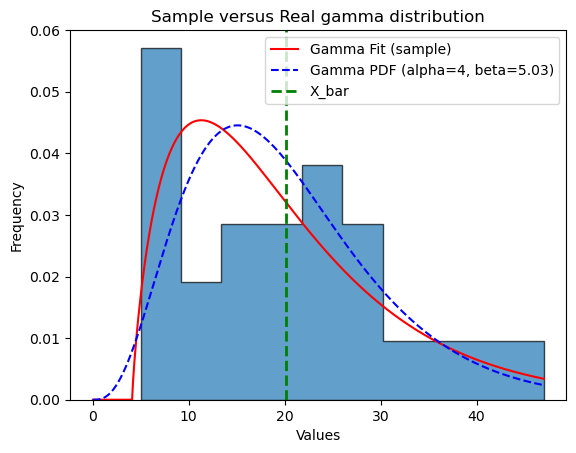

In [4]:
# Plotting the histogram
plt.hist(data, bins=10, density=True, edgecolor='black', alpha=0.7, histtype='stepfilled')

# Fitting gamma distribution to the data
shape, loc, scale = gamma.fit(data)

# Creating values for x-axis
x = np.linspace(0, max(data), 1000)

# Plotting the fitted gamma distribution PDF
pdf_fit = gamma.pdf(x, shape, loc, scale)
plt.plot(x, pdf_fit, 'r-', label='Gamma Fit (sample)')

# Generating PDF for a specific gamma distribution
pdf_generated = gamma.pdf(x, 4, loc=0, scale=Beta_MLE)
plt.plot(x, pdf_generated, 'b--', label=f'Gamma PDF (alpha={4}, beta={Beta_MLE})')

# Adding a vertical line for 
plt.axvline(X_bar, color='green', linestyle='dashed', linewidth=2, label='X_bar')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.8))

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Sample versus Real gamma distribution')

# Save the plot as a PDF file
plt.savefig('C:/Users/Popov/Documents/NES_studies/Python/Statistics/HA2/histogram_with_gamma_fit_and_generated_pdf.pdf')

# Display the plot
plt.legend()
plt.show()

## Task 5

### (b)

In [5]:
import numpy as np
from scipy.stats import norm

# Set parameters
n_obs = 80
alpha = 0.05 #significance level
n_iter = 1000000

# Values of p0 to test
p0_val = [0.5, 0.7, 0.9]

for p0 in p0_val:
    rej_H0 = 0 #counter of H0 rejected
    
    for _ in range(n_iter):
        
        # Generate random sample B(p0, n_obs)
        sample_b = np.random.binomial(1, p0, n_obs)
        
        # Calculate sample mean
        mu = np.mean(sample_b)
        
        # Calculate z-test statistic
        z_stat = np.sqrt(n_obs)*(mu - p0) / np.sqrt(p0 * (1 - p0))
        
        # Check if null hypothesis is rejected
        conf_lvl = 1 - alpha/2
        if np.abs(z_stat) > norm.ppf(conf_lvl):  # ppf - getting critical value of z-stat
            rej_H0 += 1 # if H0 is rejected - note it 
    
    # Calculate true size (number of actual cases of H0 being rejected)
    true_size = rej_H0 / n_iter
    
    # Report results
    print(f"For p0 = {p0}, True Size: {true_size}, Number of Iterations: {n_iter}")

For p0 = 0.5, True Size: 0.056479, Number of Iterations: 1000000
For p0 = 0.7, True Size: 0.037235, Number of Iterations: 1000000
For p0 = 0.9, True Size: 0.037132, Number of Iterations: 1000000
